# A few insights on the Adverse Food Events
## Provided by the FDA

This notebook is a study of a few tools that can be used to gather simple insights over a dataset. Aside from importing the required library (pandas, seaborn, numpy and matplot), the first step consisted in getting rid of missing values (NaN, 'Not Available' or null) and duplicates on the RA_Report # coloumn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

adv = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv', na_values='Not Available')

In [2]:
df = pd.DataFrame(adv)
(df.isnull().sum()/df.shape[0])*100

RA_Report #                         0.000000
RA_CAERS Created Date               0.000000
AEC_Event Start Date               40.901681
PRI_Product Role                    0.000000
PRI_Reported Brand/Product Name     0.000000
PRI_FDA Industry Code               0.000000
PRI_FDA Industry Name               0.001101
CI_Age at Adverse Event            41.702465
CI_Age Unit                        41.716785
CI_Gender                           5.414932
AEC_One Row Outcomes                0.000000
SYM_One Row Coded Symptoms          0.005507
dtype: float64

In [3]:
df.drop_duplicates(subset=['RA_Report #'])

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,NaN,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),NaN,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,NaN,NaN,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
...,...,...,...,...,...,...,...,...,...,...,...,...
90779,214478,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,5.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
90780,214479,6/29/2017,6/20/2017,Suspect,HONEST PERFECTLY GENTLE SWEET ORANGE VANILLA S...,53,Cosmetics,2.0,Year(s),Female,OTHER SERIOUS (IMPORTANT MEDICAL EVENTS),EYE IRRITATION
90781,214516,6/29/2017,1/20/2017,Concomitant,CALTRATE CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Female,"HOSPITALIZATION, VISITED AN ER",SWELLING
90784,214604,6/30/2017,NaN,Suspect,DR. PERICONE NECK & CHEST CREAM,53,Cosmetics,NaN,NaN,Female,NON-SERIOUS INJURIES/ ILLNESS,"VOMITING, URTICARIA, RASH"


The next step was to rename the most useful columns to a simpler name as well as filter said columun to a new dataframe. 

The columns used for analysis were: 
- "Product" 
- "Symptoms" 
- "Industry Name" 
- "Age", "Age Unit"
- "Gender" 
- "Outcome"

In [4]:
df = df.rename(columns={'PRI_Reported Brand/Product Name':'Product', 'SYM_One Row Coded Symptoms': 'Symptoms', 'PRI_FDA Industry Name': 'Industry Name', 'CI_Age at Adverse Event': 'Age', 'CI_Age Unit': 'Age Unit', 'CI_Gender': 'Gender', 'AEC_One Row Outcomes':'Outcome'})
df_new = df.filter(['Product','Industry Name','Age','Age Unit','Gender','Outcome','Symptoms'])
df_new.head()

,Product,Industry Name,Age,Age Unit,Gender,Outcome,Symptoms
0,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,NaN,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),NaN,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,NaN,NaN,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [5]:
df_clean = df_new.dropna()
(df_clean.isnull().sum()/df_clean.shape[0])*100

Product          0.0
Industry Name    0.0
Age              0.0
Age Unit         0.0
Gender           0.0
Outcome          0.0
Symptoms         0.0
dtype: float64

After asuring there were no missing values, I proceed by making a bar plot of the Industry Name with the most cases reported.

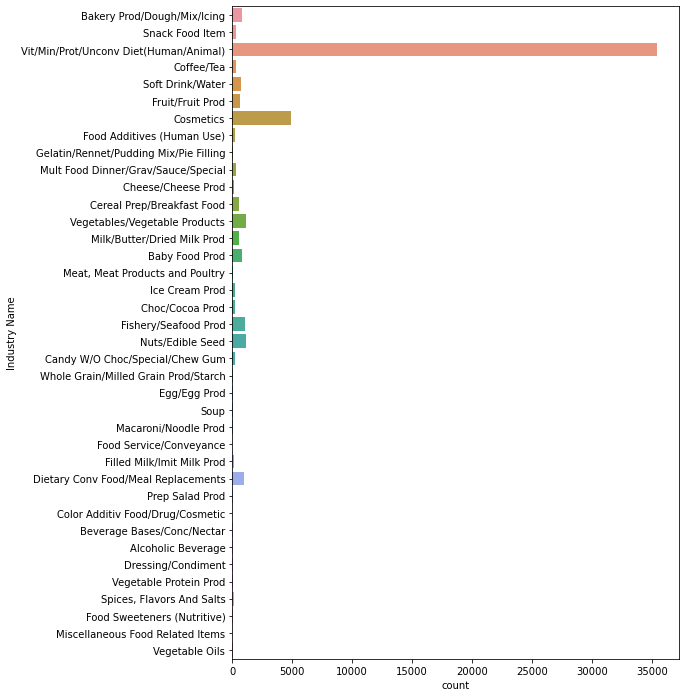

In [6]:
fig, ax = plt.subplots(figsize=(8,12))
sns.countplot(y=df_clean['Industry Name'])

Then the most common symptoms reported in the dataset

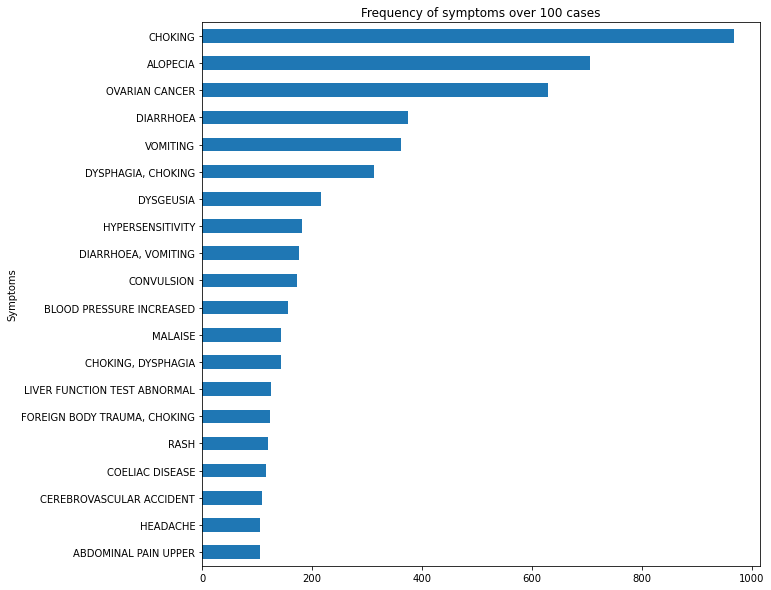

In [7]:
df_symptoms_count = df_clean.groupby('Symptoms').size().sort_values()
df_symptoms_over_100 = df_symptoms_count[(df_symptoms_count>100)]
df_symptoms_over_relevant = df_symptoms_over_100.drop(index="ALOPECIA, ALOPECIA")
df_symptoms_over_relevant.T.plot.barh(title = 'Frequency of symptoms over 100 cases',fontsize=10 , figsize=(10,10))

It appers that the two most common industries associated with adverse effect in this dataset were the **Vitamins and other non-conventional dietary products** followed by the **Cosmetics** Industry. And the most reported symptoms were **Choking, Alopecia, Ovarian Cancer, Diarrhoea and Vomiting**. 

Next I wanted to findout which product was the one with the most reported cases of adverse effects.

Text(0.5, 1.0, 'Products with more than 100 health events')

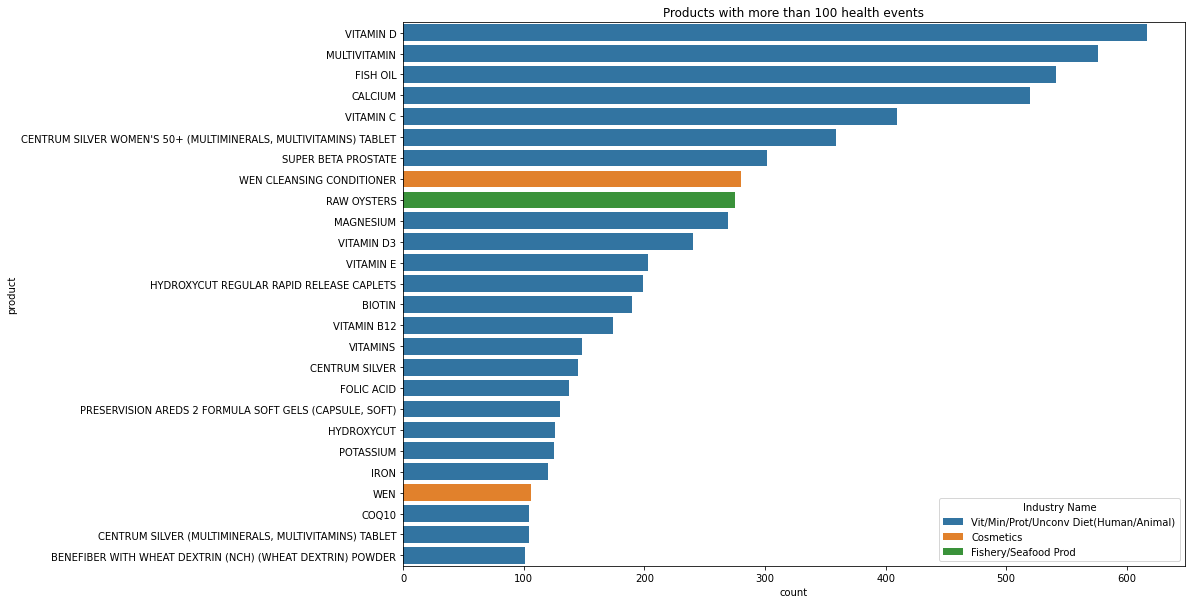

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
product_count = df_clean.groupby('Product').size().sort_values(ascending=False)
product_count_large = product_count[(product_count>100) & (product_count.index!='REDACTED')]

product_count_df = pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index=None)
new = product_count_df.merge(df_clean[['Product','Industry Name']],how = 'inner', left_on = 'product', right_on = 'Product').drop_duplicates()[['count','product','Industry Name']]
sns.barplot(x = 'count',y = 'product',hue = 'Industry Name',data = new,dodge = False).set_title("Products with more than 100 health events")

It appears that Vit D, Multivatimins, Fish Oil and Calcium were the most reported products. From other industries, its noteworthy that Raw oysters and Conditioners were the most products with adverse Reactions.

It's also worth mentioning that Since most of the products were REDACTED from the dataset, it's impossible to really tell which products were, in fact, responsible for the most adverse effects. 

The next insight I was looking for was which food is responsible for the most deaths in this dataset.

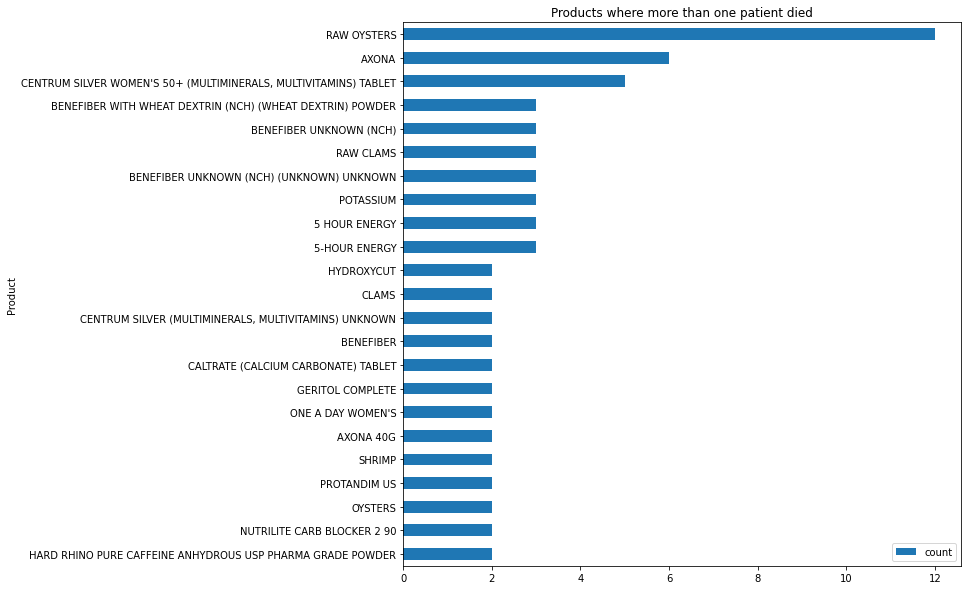

In [47]:
deadly = df_clean[(df_clean['Symptoms'].str.contains('DEATH'))]
product_count = deadly.groupby('Product').size().sort_values()
product_count_relevant = product_count[(product_count>1) & (product_count.index!='REDACTED')]
product_count_df = pd.DataFrame({'product':product_count_relevant.index,'count':product_count_relevant}, index=None)
product_count_df.plot.barh(title = 'Products where more than one patient died' ,fontsize=10, figsize=(10,10))

After excluding the redacted products that resulted in death of the patient, it seems that **Raw oysters, Axona and Centrum silver women 50+** were the top 3 most reported cases in this category.

The next step on the data exploration was to analyse the relation between the products and different age groups. However, some data cleaning needed to be done beforehand, since the FDA1s dataset had different and weird units for measuring age:

In [10]:
age_unit = pd.DataFrame(df_clean['Age Unit'].value_counts())
age_unit

,Age Unit
Year(s),50213
Month(s),1096
Week(s),153
Day(s),139
Decade(s),8


To measure a patient age by weeks and months its useful when it comes to infants, but to measure by decade is a very strange method.
To be able to analyse the age of the patients better, all values were normalized by Year and the normalized values was stored in a new column named **"Age Norm"**.

In [11]:
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors = 'coerce')
def convert_age(row):
    age = row['Age']
    unit = row ['Age Unit']
    
    lookup = {'Year(s)': 1.0,
             'Month(s)': 12.0,
             'Week(s)': 52.0,
             'Day(s)': 365.0,
             'Decade(s)': .1}
    
    if unit != 'Not Available':
        return float(age)/lookup[unit]
    
df_clean['Age Norm'] = df_clean.apply(lambda row:convert_age(row), axis = 1)
df_clean = df_clean.drop(df_clean[df_clean['Age Norm']>105].index)


<ipython-input-11-7a98a260967a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors = 'coerce')
<ipython-input-11-7a98a260967a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Norm'] = df_clean.apply(lambda row:convert_age(row), axis = 1)


After that, 5 age groups were created to categorize each patient: **Baby, Child, teenager, young adult, adult and senior**. The group of the patient of eache record was then stored in a new column named **"Age Bins"**

In [12]:
def agebins(age):
    
    if age < 2:
        return 'baby'
    
    if age >=2 and age < 13:
        return 'child'
    
    if age >= 13 and age < 20:
        return 'teenager'
    
    if age >= 20 and age < 35:
        return 'youngAdult'
    
    if age >=35 and age < 60:
        return 'adult'
    
    if age >= 60:
        return 'senior'

df_clean['Age Bins'] = df_clean['Age'].apply(lambda x: agebins(x))

After grouping the patients, I could better visualize how many reports were made in each category of age.

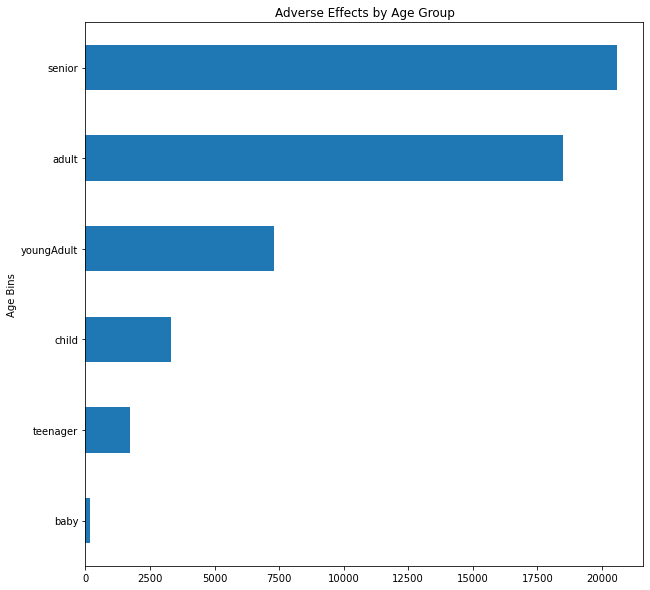

In [13]:
df_ages = df_clean.groupby('Age Bins').size().sort_values()
df_ages.plot.barh(title='Adverse Effects by Age Group' ,fontsize=10, figsize=(10,10))

Next I wanted to see which products were the most reported for each age group. In order to better filter the data, I first tried to to establish that only products with more than 100 reports would be considered relevant. However, this requeriment could be only applied to the senior and the adult population, since the other age groups had only REDACTED products with more than 100 reports. Therefore, for the remaining groups I decided to filter for the top 5 products reported in each population group.

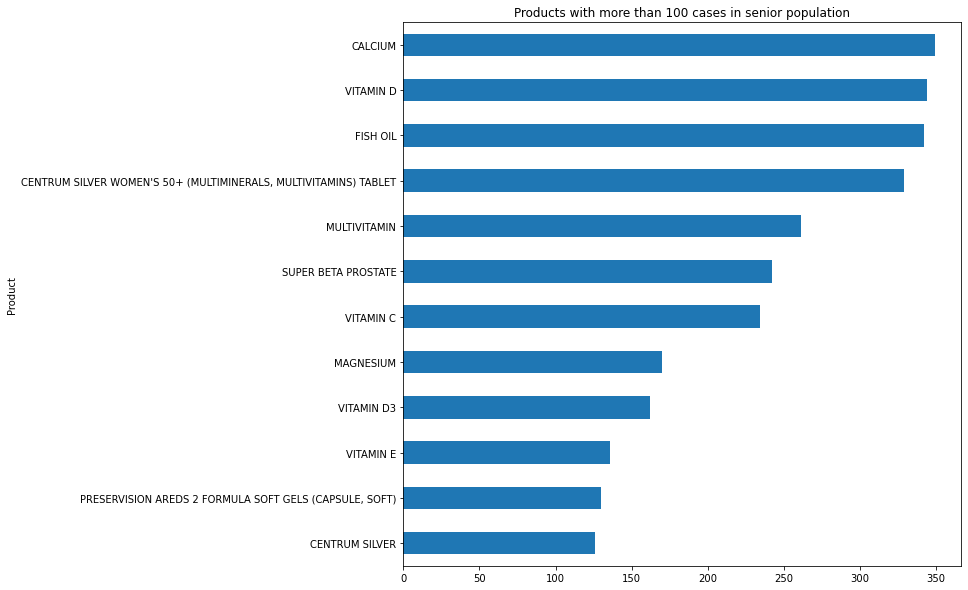

In [14]:
df_age_product = df_clean.filter(['Product', 'Age Bins'], axis = 1)

df_seniors = df_age_product[(df_age_product['Age Bins'].str.contains("senior"))]
df_seniors_count = df_seniors.groupby('Product').size().sort_values()
df_seniors_relevant = df_seniors_count[(df_seniors_count>100) & (df_seniors_count.index!='REDACTED')]
df_seniors_relevant.plot.barh(title='Products with more than 100 cases in senior population' ,fontsize=10, figsize=(10,10))

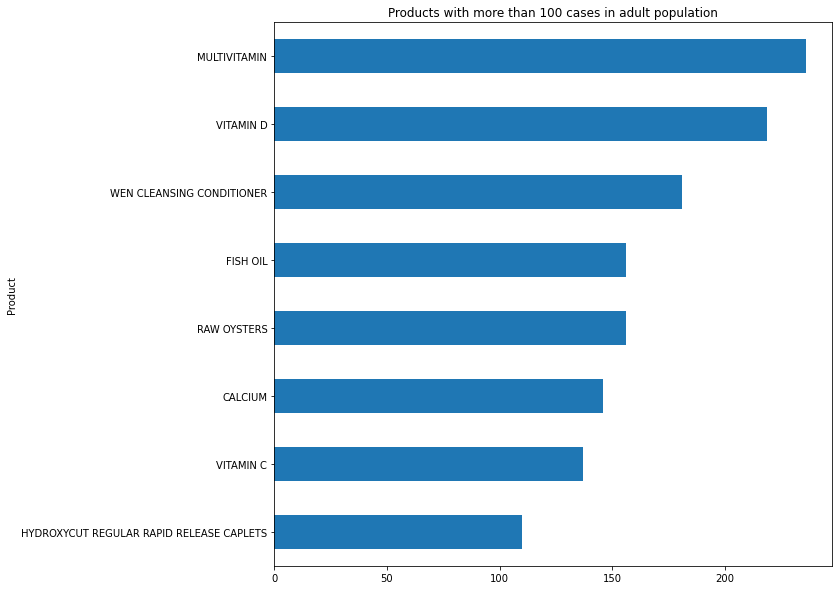

In [15]:
df_adults = df_age_product[(df_age_product['Age Bins'].str.contains("adult"))]
df_adults_count = df_adults.groupby('Product').size().sort_values()
df_adults_relevant = df_adults_count[(df_adults_count>100) & (df_adults_count.index!='REDACTED')]
df_adults_relevant.plot.barh(title='Products with more than 100 cases in adult population' ,fontsize=10, figsize=(10,10))

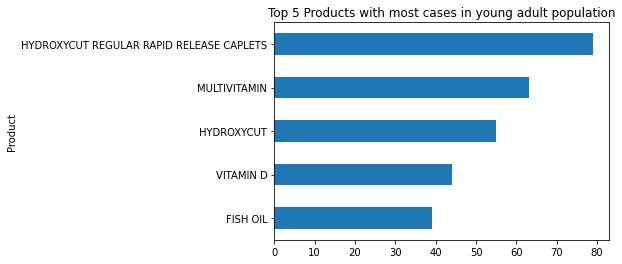

In [16]:
df_youngAdult = df_age_product[(df_age_product['Age Bins'].str.contains("youngAdult"))]
df_youngAdult_count = df_youngAdult.groupby('Product').size().sort_values(ascending=False)
df_youngAdult_relevant = df_youngAdult_count[df_youngAdult_count.index!='REDACTED'] 
df_youngAdult_top = df_youngAdult_relevant[:5].sort_values()
df_youngAdult_top.plot.barh(title='Top 5 Products with most cases in young adult population')

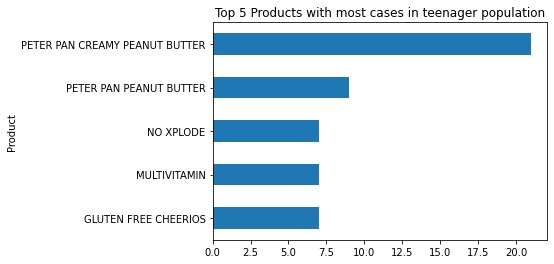

In [17]:
df_teenager = df_age_product[(df_age_product['Age Bins'].str.contains("teenager"))]
df_teenager_count = df_teenager.groupby('Product').size().sort_values(ascending=False)
df_teenager_relevant = df_teenager_count[df_teenager_count.index!='REDACTED'] 
df_teenager_top = df_teenager_relevant[:5].sort_values()
df_teenager_top.plot.barh(title='Top 5 Products with most cases in teenager population')

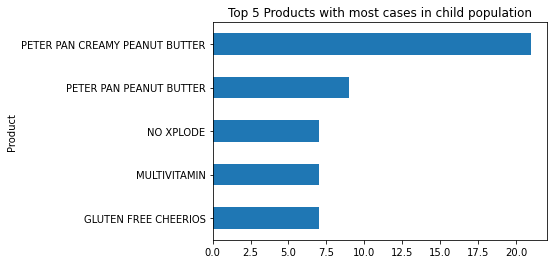

In [18]:
df_child = df_age_product[(df_age_product['Age Bins'].str.contains("teenager"))]
df_child_count = df_child.groupby('Product').size().sort_values(ascending=False)
df_child_relevant = df_child_count[df_child_count.index!='REDACTED'] 
df_child_top = df_child_relevant[:5].sort_values()
df_child_top.plot.barh(title='Top 5 Products with most cases in child population')

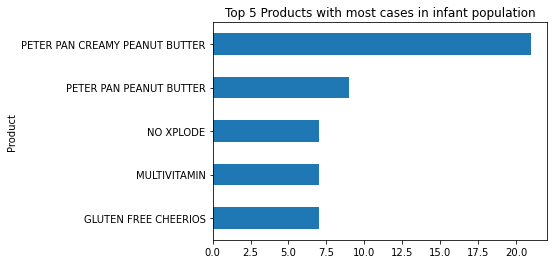

In [19]:
df_baby = df_age_product[(df_age_product['Age Bins'].str.contains("teenager"))]
df_baby_count = df_baby.groupby('Product').size().sort_values(ascending=False)
df_baby_relevant = df_baby_count[df_baby_count.index!='REDACTED'] 
df_baby_top = df_baby_relevant[:5].sort_values()
df_baby_top.plot.barh(title='Top 5 Products with most cases in infant population')